In [ ]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import math


In [2]:
data_path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

df_csv = os.path.join(data_path, "train.csv")

In [3]:
df = pd.read_csv(df_csv)

In [4]:
print(df.shape)

(2000, 21)


In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df['price_range'].value_counts()


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [10]:
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df[df['price_range'] == 3].sample(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1217,1451,1,0.5,0,5,1,57,0.6,181,8,...,812,1456,3038,15,7,18,1,0,1,3


In [12]:
df[df['price_range'] == 0].sample(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1699,1002,1,1.8,0,1,0,45,0.7,180,7,...,948,1007,1234,19,13,18,1,1,0,0


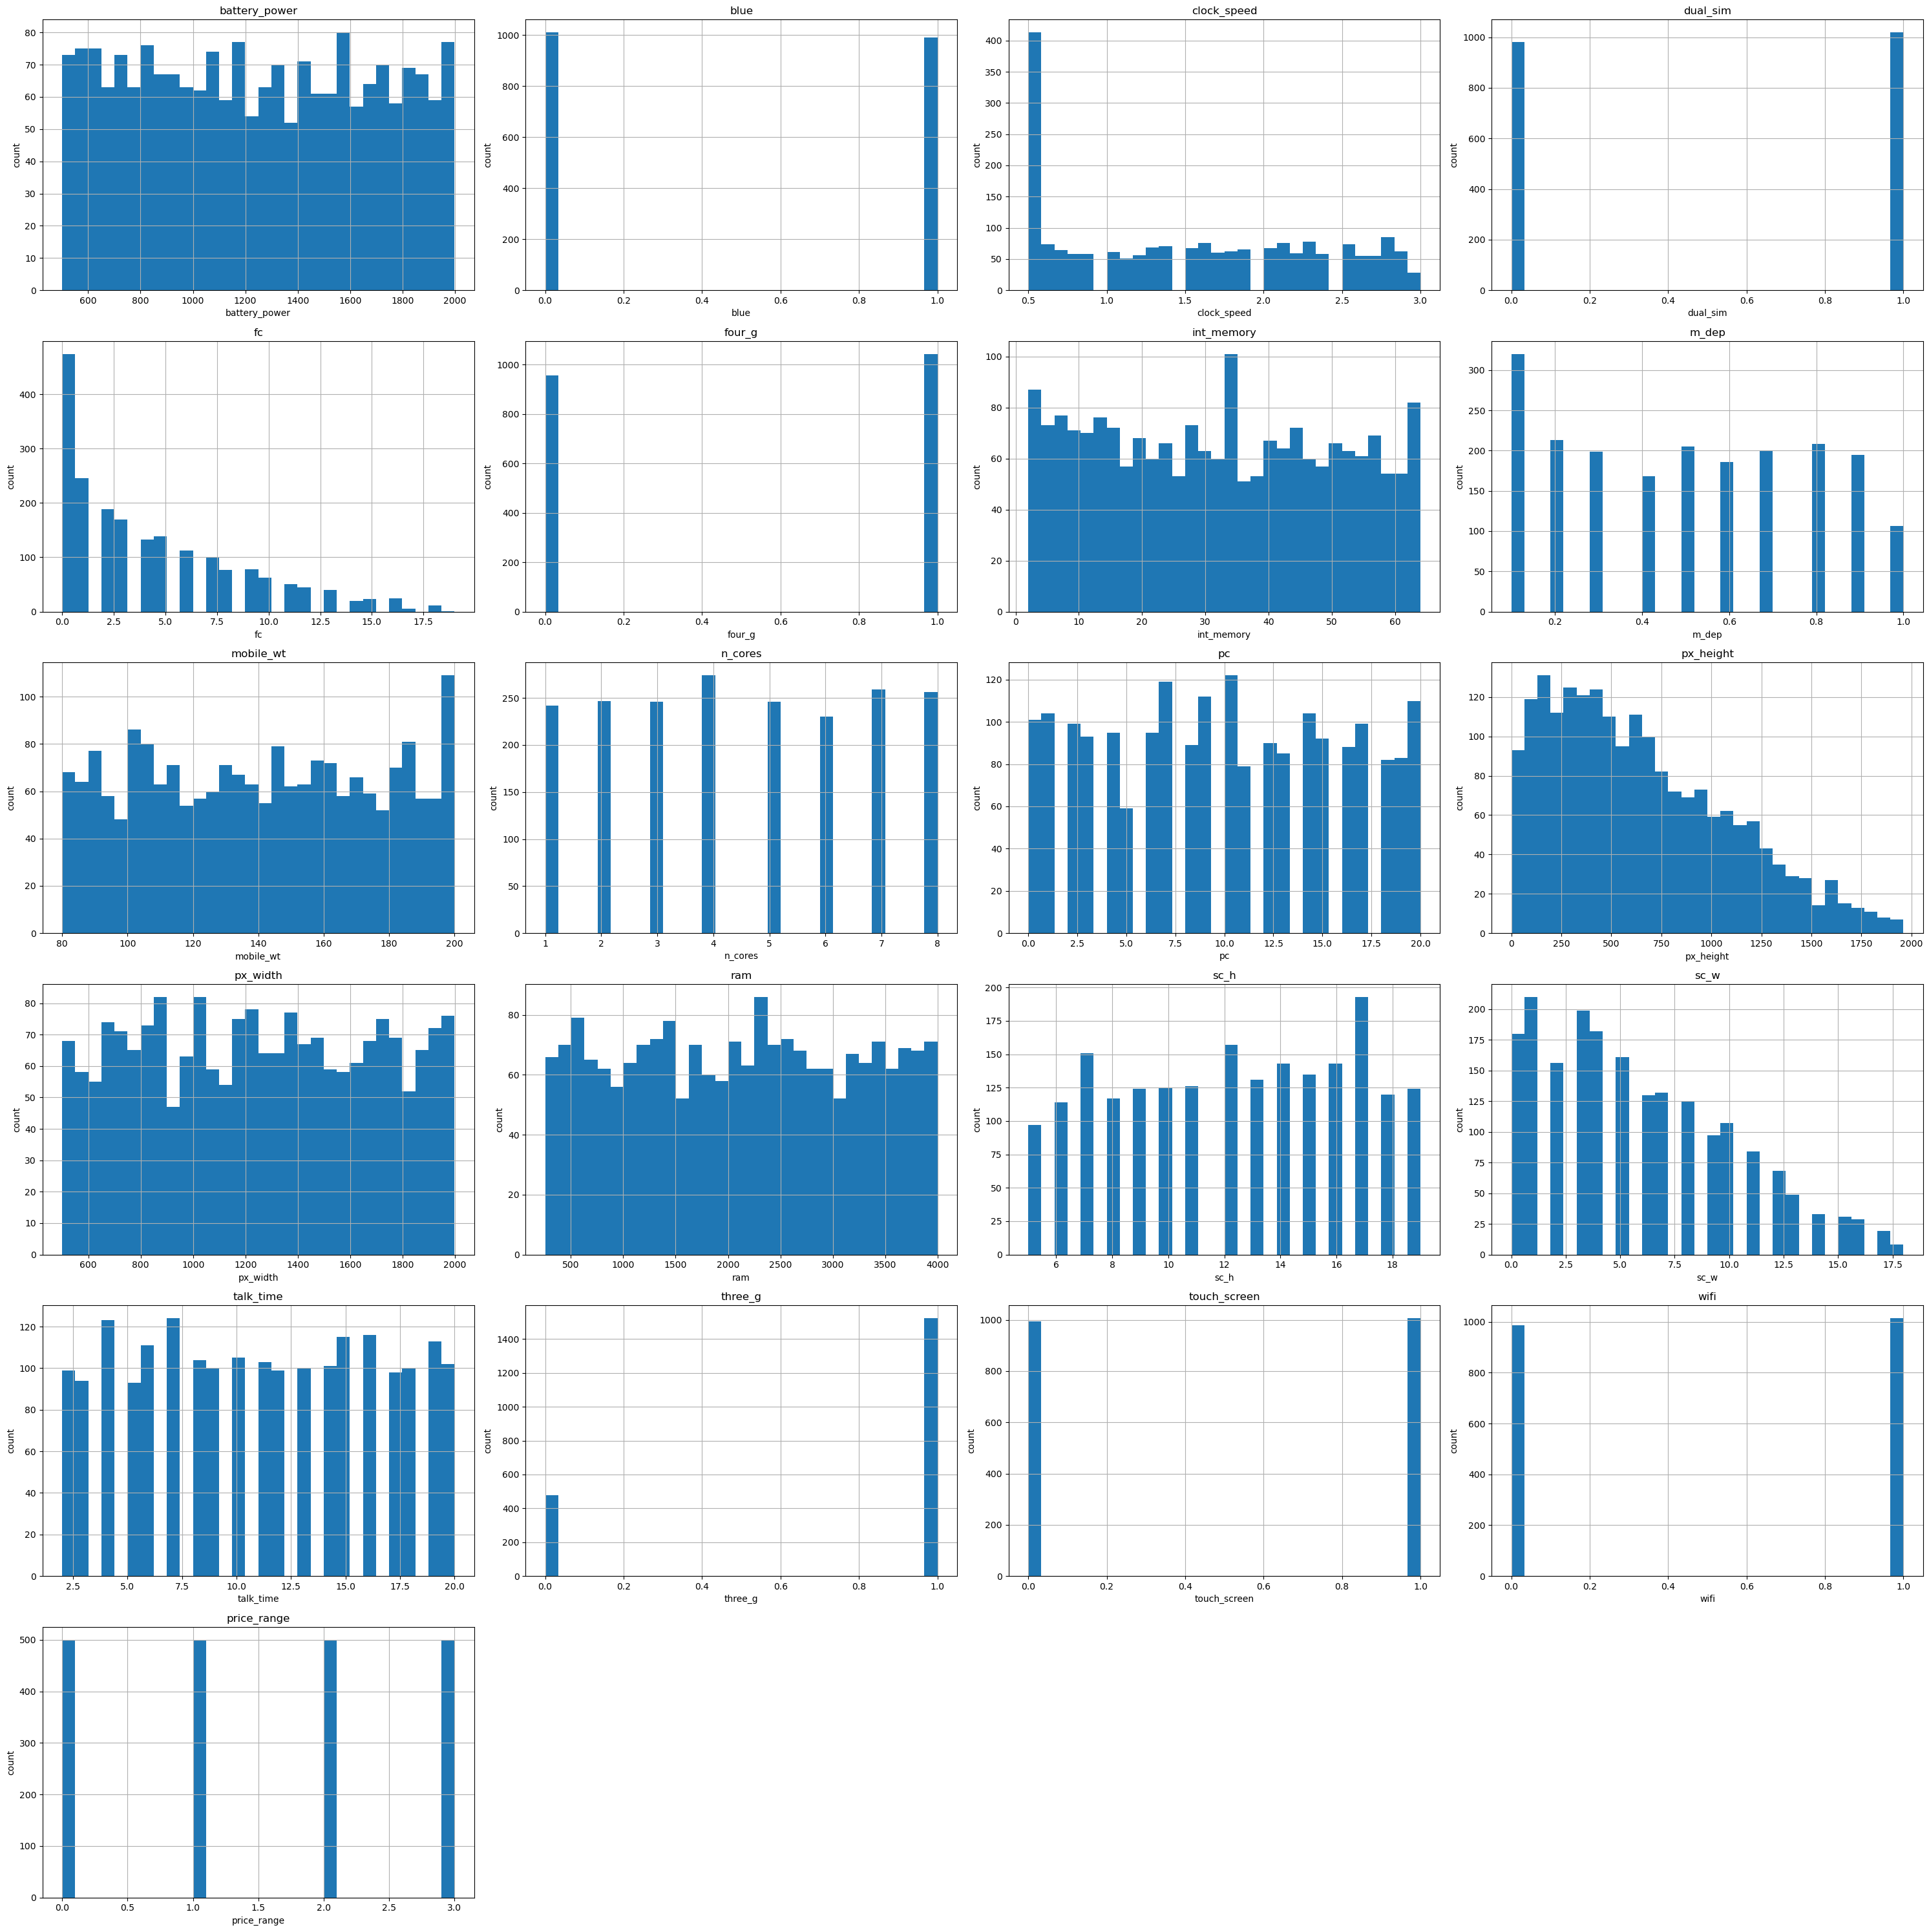

In [13]:
cols = df.columns
num_cols = len(cols)
n_rows = 6  # You can change this to 3 for more rows
n_cols = math.ceil(num_cols / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

axes = axes.flatten()  # Flatten in case of multiple rows

for idx, col in enumerate(cols):
    df[col].hist(bins=30, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('count')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

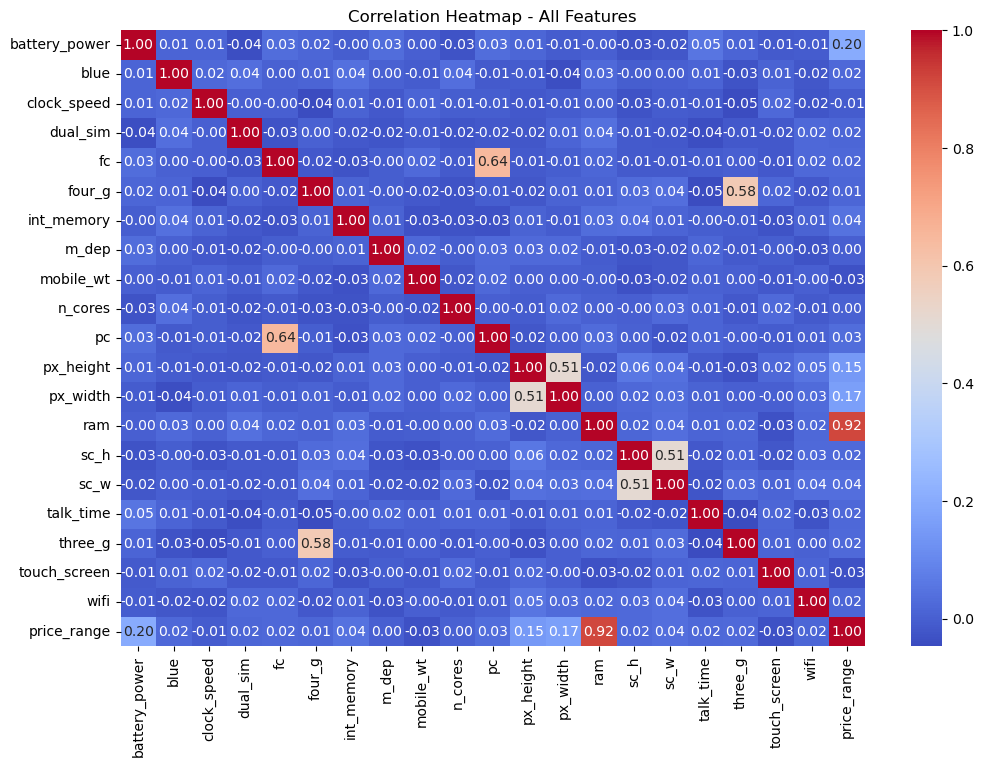

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap - All Features")
plt.show()

we can see high corlition between ram and price , and corlation between sc_h sc_w , corlation three g and four g , pc and fc , From correlation analysis, ram have high coorelation. sc_h and sc_w have coorelation and it is better to create new variable sc_size by multiplying both. px_height,px_width have correlation and it is better to create new variable sc_area by multiplying both. Camera specifications(fc and pc) have coorelation so it is better to drop one and keep another. three_g and four_g have high correlation, but we want to keep both.

In [15]:
df['screen_size'] = df['sc_h'] * df['sc_w']
df['screen_area'] = df['px_height'] * df['px_width']

df.drop(['sc_h', 'sc_w', 'px_height', 'px_width', 'pc'], axis=1, inplace=True)
df.shape

(2000, 18)

In [16]:
X=df.drop('price_range', axis=1)
y=df['price_range']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 17) (400, 17) (1600,) (400,)


In [18]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg_params = {"C": [0.01, 0.1, 1, 10], "solver": ["lbfgs", "liblinear"]}

# KNN
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": [3,5,7,9], "weights": ["uniform", "distance"]}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [100, 200],
             "max_depth": [None, 10, 20],
             "min_samples_split": [2, 5]}

# # XGBoost
# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
# xgb_params = {"n_estimators": [100, 200],
#               "max_depth": [3, 6, 10],
#               "learning_rate": [0.01, 0.1, 0.2]}

models = {
    "Logistic Regression": (log_reg, log_reg_params, X_train, X_test),
    "KNN": (knn, knn_params, X_train, X_test),
    "Random Forest": (rf, rf_params, X_train, X_test),
    # "XGBoost": (xgb_clf, xgb_params, X_train, X_test),
}

Training Logistic Regression ...


c:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Logistic Regression Accuracy: 0.6425
Best Params: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.55      0.36      0.44        91
           2       0.45      0.43      0.44        92
           3       0.66      0.85      0.74       112

    accuracy                           0.64       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.63      0.64      0.63       400



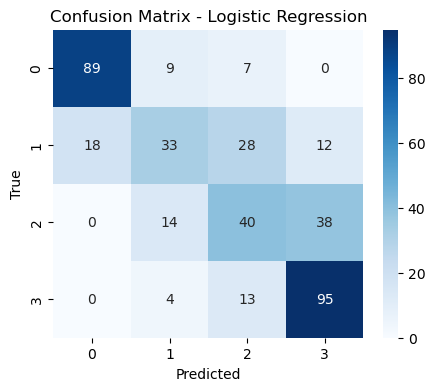

------------------------------------------------------------
Training KNN ...
KNN Accuracy: 0.3950
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       105
           1       0.29      0.35      0.32        91
           2       0.31      0.39      0.34        92
           3       0.48      0.34      0.40       112

    accuracy                           0.40       400
   macro avg       0.41      0.39      0.40       400
weighted avg       0.42      0.40      0.40       400



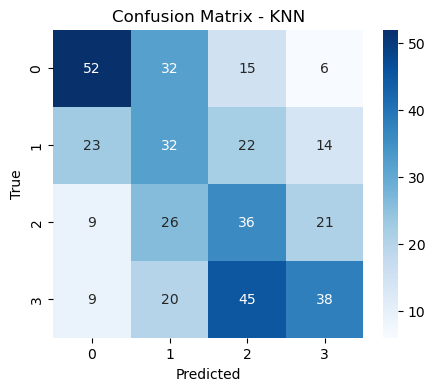

------------------------------------------------------------
Training Random Forest ...
Random Forest Accuracy: 0.8825
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.88      0.82      0.85        91
           2       0.77      0.88      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



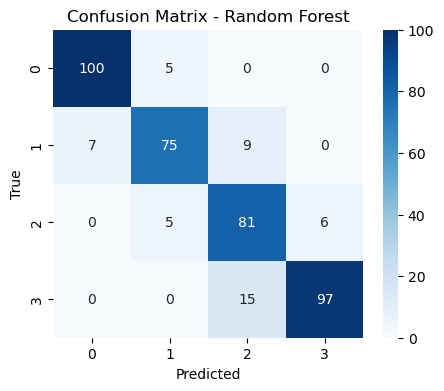

------------------------------------------------------------


In [19]:
results = {}

for name, (model, params, Xtr, Xte) in models.items():
    print(f"Training {name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(Xtr, y_train)
    
    y_pred = grid.predict(Xte)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = (acc, grid.best_params_)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print("-"*60)

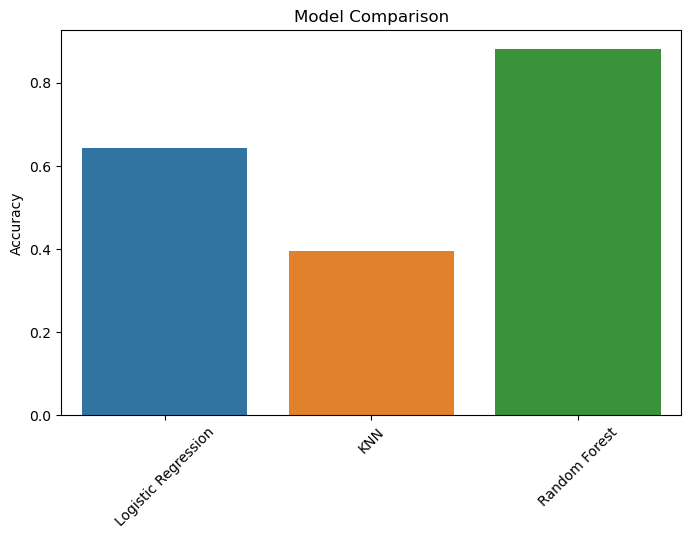

,Accuracy,Best Params
Logistic Regression,0.6425,"{'C': 1, 'solver': 'liblinear'}"
KNN,0.395,"{'n_neighbors': 3, 'weights': 'distance'}"
Random Forest,0.8825,"{'max_depth': None, 'min_samples_split': 2, 'n..."


In [20]:
# השוואת מודלים
res_df = pd.DataFrame(results).T
res_df.columns = ["Accuracy", "Best Params"]

plt.figure(figsize=(8,5))
sns.barplot(x=res_df.index, y=res_df["Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()

res_df


In [21]:
from joblib import dump

# למצוא את המודל עם ה-Accuracy הכי גבוה
best_model_name = res_df["Accuracy"].astype(float).idxmax()
best_model_accuracy = res_df.loc[best_model_name, "Accuracy"]

print(f"Best model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

best_model = models[best_model_name][0]
best_model.fit(X_train, y_train)

dump(best_model, "best_model.joblib")
print("Best model saved as 'best_model.joblib'")

Best model: Random Forest with Accuracy: 0.8825
Best model saved as 'best_model.joblib'
